## Выявление закономерностей, определяющих успешность продукта в отрасли видеоигр 

<img src='https://pbs.twimg.com/media/EESRZDrX4AIkmOi.jpg:large' alt='Nintendo / PlayStation / XBox / PC'>

In [1]:
# установим библиотеку squarify для построения древовидных карт

In [2]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
import seaborn as sns
from scipy.stats import levene
from scipy import stats as st

0. **[Описание проекта](#1)**


1. **[Открытие и описание данных](#2)**
    * [Описание данных](#3)
    * [Игровые платформы](#4)
        * [Распределение игр по платформам]
        * [Sony PlayStation]
        * [Microsoft XBox]
        * [Nintendo]
        * [Другие платформы]
    * [Игровые жанры](#5)
    * [Возрастной рейтинг](#6)
   
    
2. **[Предобработка данных](#7)**
    * [Приведение названий столбцов к нижнему регистру](#8)
    * [Изменение типов данных](#9)
    * [Обработка пропусков](#10)
         * [Пропуски в возрастном рейтинге]
         * [Пропуски в названиях]
         * [Оставшиеся пропуски]
    * [Проверка на дубликаты](#11)
    * [Приведение оценок к общей шкале](#12)
    * [Расчет общего количества продаж](#13)
    * [Категоризация данных](#14)
         * [Категоризация платформ]
         * [Устранение ошибок в категорриях возрастного рейтинга]
   
    
3. **[Анализ данных](#15)**
    * [Изменение рынка по годам](#16)
    * [Изучение игровых платформ](#17)
    * [Определение платформ с наибольшими суммарными показателями продаж](#18)
    * [Изучение данных за актуальный период](#19)
    * [Диаграмма размаха ("ящик с усами")](#20)
    * [Влияния оценок на продажи](#21)
    * [Распределение игр по жанрам](#22)
    * [Вывод](#23)
    
    
4. **[Портпет пользователей по регионам](#24)**
    * [Топ 5 жанров](#25)
    * [Лидеры популярности по жанрам среди игр](#025)
    * [Топ 5 платформ](#26)    
    * [Влияние рейтинга ESRB на продажи](#27) 
    * [Портрет геймера](#28) 
    
    
5. **[Проверка гипотез](#29)**
    * [Гипотеза №1 "О равенстве средних рейтингов игр для PC и XBox One"](#30)
    * [Гипотеза №2 "О равенстве средних рейтингов игр жанров Action и Sports"](#31)
    

6. **[Общий вывод](#32)**

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Молодец, отличное оформление вводной части проекта. Здорово, что план выполнения ты сделал в виде удобной навигации.

</div>

### <a id="1">0. Описание проекта</a>

Мы работаем в интернет-магазине *«Стримчик»*, который продаёт по всему миру компьютерные и видеоигры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, **Xbox** или **PlayStation**). 

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании нашего интернет-магазина.

Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й год. Необходимо отработать принцип работы с данными, выделить закономерности и построить модель прогнозирования популярности тех или иных игр, исходя из их характеристик (платформа, жанр, возрастной рейтинг, оценки критиков, и т.п.)

В процессе работы над проектом мы столкнемся с пропусками в данных, некорректными типами данных и неподходящими значениями для корректного типа, построим различные диаграммы распределений, размаха, отношения и рассеяния. Изучим различия игрового рынка по регионам: *северно-американскому, европейскому и японскому* и нарисуем портрет типичного геймера - представителя каждого из регионов. Выясним, какие игровые платформы и жанры пользуются наибольшей популярностью. В конце выдвинем и проверим пару гипотез.

По ходу работы интересные мысли и результаты будем оформлять в виде небольших промежуточных выводов, в конце 3 раздела напишем обобщающий вывод по анализу данных, а 6 раздел полностью будет посвящен выводам о проделанной работе.

### <a id="2">1. Открытие и изучение данных</a>

In [4]:
games = pd.read_csv('C:\\Users\\503so\\OneDrive\\Desktop\\praktikum-to-git\\games.csv')

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### <a id="3"> 1.1. Описание данных</a>

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Мы видим, что шкалы оценок *пользователей* и *критиков* различаются. Для того, чтобы иметь возможность сравнивать эти показатели, необходимо будет привестии их к общей шкале.

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исследуемой таблице данных *11 столбцов и 16715 строк*. Пропуски отсутствуют только в столбцах, содержащих название игровой платформы и информацию о продажах по разным регионам. Больше всего пропусков в столбцах **"Оценка критиков"** и **"Возрастной рейтинг"**.

Можем обратить внимание на то, что тип данных в столбце **"year_of_release"** - *float*. Использовать в данном случае формат *datetime* нецелесообразно, поскольку мы не обращаемся к дате целиком, а только к году как к некоему порядковому категориальному показателю. В таком случае предпочтительнее формат *integer*, однако и его мы не можем использовать, пока у нас в столбце имеются пропуски в значениях.

Также данные, содержащиеся в столбце **"user_score"** относятся к типу *object*, приведем в дальнейшем их к типу *float*.

### <a id="4">1.2. Игровые платформы</a>

Выясним, к каким платформам и в каком количестве относятся игры из нашего датасета.

In [7]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Как видно, очистка данных не требуется, дубликаты отсутствуют. Однако в дальнейшем имеет смысл выполнить категоризацию данных: объединить в три большие категории разные поколения платформ **Xbox**, **PlayStation** и **Nintendo**, выделить в отдельную категорию **портативные платформы**, а также объединить наименее представленные платформы в **общую категорию**.

Напишем функцию *game_squarify* для построения древовидной карты сгруппированных данных датасета **games**, в качестве параметров передадим *column* - названиение столбца, по которому будет производиться группировка, и *cat* - строковый объект, содержащий информацию  о категории, по которой произведена группировка.

In [8]:
def game_squarify(column, cat):
    game_plot = games.groupby(column).size().reset_index(name='counts')
    labels = game_plot.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = game_plot['counts'].values.tolist()
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

    plt.figure(figsize=(12,8), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

    plt.title('Распределение игр в исследуемых данных по ' + cat)
    plt.axis('off')
    plt.show()


Выведем древовидную карту по игровым платформам.

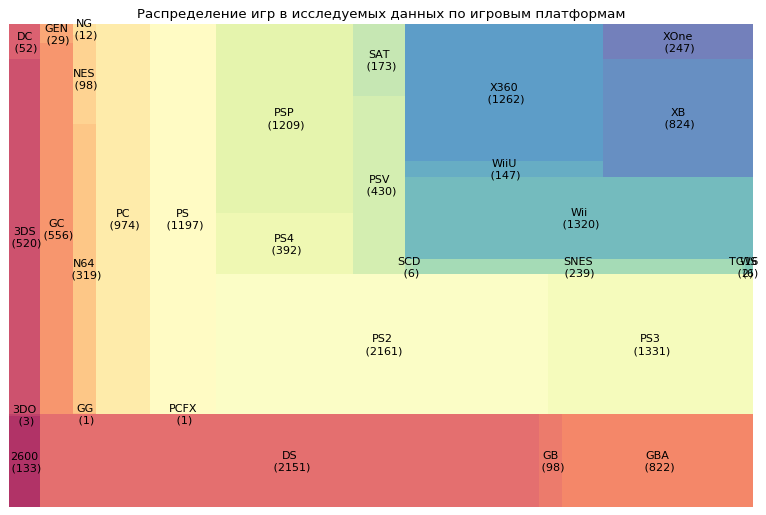

In [9]:
game_squarify('Platform', 'игровым платформам')

Выясним, что обозначает каждая из аббревиатур, и выдвинем предположение о возможных укрупненных категориях игровых платформ.

<h3>Sony Playstation:</h3>
    <p></p>
    <li>
        <ul><b>PS</b> - Первое поколение игровой приставки Sony PlayStation, выпущенное в 1994 году. За 11 лет производства приставки было продано более <i>100 миллионов</i> единиц.</ul>
        <ul><b>PS2</b> - Второе поколение игровой приставки Sony PlayStation, выпущенное в 2000 году. За 12 лет  продано <i>155.1 миллионов единиц</i>.</ul>
        <ul><b>PS3</b> - Третье поколение игровой приставки Sony PlayStation, выпущенное в 2006 году. За 10 лет  продано <i>87 миллионов единиц</i>.</ul>
        <ul><b>PS4</b> - Четвертое поколение игровой приставки Sony PlayStation, выпущенное в 2013 году. На момент получения данных для анализа являлась актуальной версией приставки от компании Sony. На конец 2017 года было продано <i>73.6 миллиона устройств</i> (на начало 2021 года этот показатель составляет <i>113.8 миллионов устройств</i>).</ul>
        <ul><b>PSP</b> - Playstation Portable, первая портативная приставка компании Sony, выпущенная в 2004 году.  На конец 2013 года реализовано <i>80 миллионов экземпляров</i>.</ul>
        <ul><b>PSV</b> - Playstation Vita, второе поколение портативной консоли компании Sony. Выпущена в 2011 году, за 7.5 лет продано <i>15.3 миллиона экземпляров</i>.</ul>
    </li>
    <p></p>
<h3>Microsoft XBox:</h3>
    <p></p>
    <li>
        <ul><b>XB</b> - XBox, первая игровая консоль компании Microsoft, выпущенная в 2001 году. За 8 лет реализовано <i>24 миллиона экземпляров</i>.</ul>
        <ul><b>X360</b> - второе поколение приставки, выпущенное в 2005 году. На конец 2016 года реализовано <i>85.38 миллионов экземпляров</i>.</ul>
        <ul><b>XOne</b> - третье поколение приставки. Выпущено в 2013 году, продано <i>41.2 миллиона экземпляров</i>.</ul>
    </li>
    <p></p>
<h3>Nintendo:</h3>
    <p></p>
    <li>
        <ul><b>NES</b> - Nintendo Entertainment System, первая игровая приставка Nintendo, выпущенная в 1983 году под названием Famicom (переименована в 1985 году). За 20 лет реализовано <i>61.91 миллиона экземпляров</i>.</ul>
        <ul><b>GB</b> - GameBoy - первое поколение портативной приставки, выпущенное в 1989 году. Реализовано <i>118.69 миллионов экземпляров</i>.</ul>
        <ul><b>SNES</b> - Super Nintendo Entertainment System - второе поколение приставки. Выпущено в 1990 году, за 9 лет продано <i>49 миллионов экземпляров</i>.</ul>
        <ul><b>N64</b> - Nintendo 64 - третье поколение приставки. Выпущено в 1996 году, за 7 лет продано <i>32.93 миллиона экземпляров</i>.</ul>
        <ul><b>GC</b> - GameCube - четвертое поколение приставки. Выпущено в 2001 году, за 6 лет продано <i> 21.74 миллиона экземпляров</i>.</ul>
        <ul><b>GBA</b> - GameBoy Advance - второе поколение портативной приставки. Выпущено в 2001 году, за 7 лет продано <i>79.46 миллионов экземпляров</i>.</ul>
        <ul><b>DS</b> - Nintendo DS - третье поколение портативной приставки. Выпущено в 2004 году, за 9 лет продано <i>154.1 миллиона экземпляров</i>.</ul>
        <ul><b>Wii</b> - пятое поколение приставки. Выпущено в 2006 году, за 7 лет продано <i>101.63 миллиона экземпляров</i>.</ul>
        <ul><b>3DS</b> - Nintendo 3DS - четвертое поколение портативной приставки. Выпущено в 2011 году, за 9 лет продано <i>75.77 миллиона экземпляров</i>.</ul>
        <ul><b>WiiU</b> - шестое поколение приставки. Выпущено в 2012 году, за 5 лет продано <i>13.56 миллионов экземпляров</i>.</ul>
    </li>
    <p></p>
<h3>Другие производители:</h3>
    <p></p>
    <li> 
        <ul><b>3DO</b> - игровая приставка Panasonic, выпущенная в 1993 году, за 3 лет продано <i>2 миллионов экземпляров</i>.</ul>
        <ul><b>GEN</b> - игровая приставка Sega Genesis, выпущенная в 1988 году, за 9 лет продано <i>39.7 миллионов экземпляров</i>.</ul>
        <ul><b>SAT</b> - игровая приставка Sega Saturn, выпущенная в 1994 году, за 6 лет продано <i>9.5 миллионов экземпляров</i>.</ul>
        <ul><b>2600</b> - игровая приставка Atari 2600, выпущенная в 1977 году, продано <i>около 40 миллионов экземпляров</i>.</ul>
        <ul><b>DC</b> - игровая приставка Dandy Classic, выпущенный в 1992 году клон NES. Продано <i>около 2 миллионов экземпляров</i>.</ul>
        <ul><b>NG, SCD, WS, TG16, GG и PCFX</b> представлены в нашем датасете слабо.</ul>
    </li>

Опираясь на представленную выше информацию можно сформулировать основные категории производителей игровых приставок: **Sony (Playstation), Microsoft (XBox), Nintendo и "Другие"**. 

В отдельную категорию имеет смысл выделить **портативные игровые приставки**, поскольку они не являются прямыми конкурентами домашних игровых систем, а в настоящее время данная ниша заполняется смартфонами, выполняющими помимо прочего и функцию портативной игровой мультимедийной приставки.

### <a id="5">1.3. Игровые жанры</a>

Выясним, как распределены игры в исследуемых данных по жанрам. Для этого построим древовидную карту распределения.

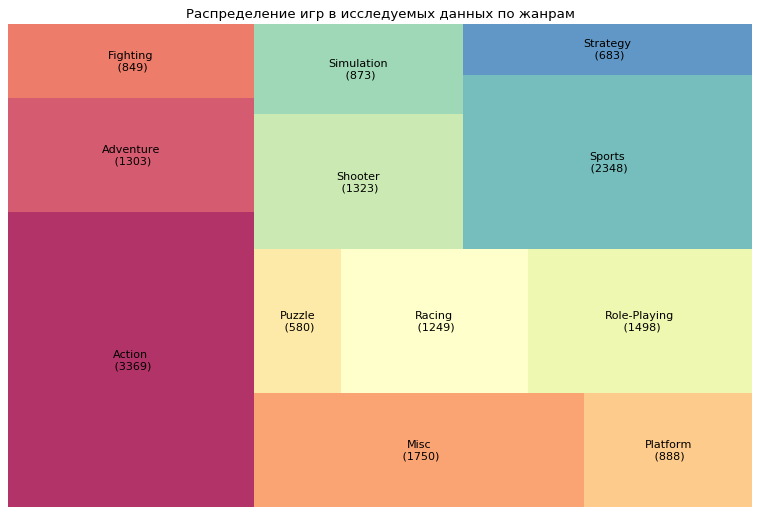

In [10]:
game_squarify('Genre', 'жанрам')

Как мы видим, проблем с данными в столбце **`genre`** не наблюдается. Неявные дубликаты отсутствуют.

На первом месте с ощутимым отрывом и показателем в *3369* записей лидирует жанр **Action**. На втором месте со значением, почти на треть меньшим, - *2348* записей, располагаются игры жанра **Sport**. На третьем месте - игры жанра **Misc** с *1750* записями(в классификации <a href = "https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80#%D0%9F%D0%BE_%D0%9A%D1%80%D0%BE%D1%83%D1%84%D0%BE%D1%80%D0%B4%D1%83_(1984)">по Кроуфорду</a> к данному жанру относятся игры жанра Action, не вошедшие по классификации в один из 5 поджанров). На данный момент такую классификацию скорее стоит считать устаревшей, однако она дает понимание того, что из себя могут представлять игры жанра **Misc** *(от англ. "miscellaneous" - разнообразный, смешанный)*.

*От 1249 до 1498* записей имеют жанры **Racing, Adventure, Shooter, Role-Playing** (по возрастающей).

*Менее 1000* записей (*от 888 до 580*) имеют жанры **Platform, Simulation, Fighting, Strategy и Puzzle** (по убывающей).

Это говорит о том, что наибольшей популярностью пользуются более активные игры (представлены наибольшим разнообразием). 

Также можем заметить, что деление на категории по жанрам выполнено по геймплейной составляющей, и не вкючает непосредственно жанр (военные игры, игры жанра horror, истрические, научная фантастиика, фэнтези, и т.д.)

### <a id="6"> 1.4. Возрастной рейтинг </a>

<a href = "https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board">Возрастной рейтинг ESRB </a> стал применяться на территории стран США и Канада с 1994 года. В связи с этим игры, вышедшие до указанного года, могут иметь пропуски в графе с рейтингом ESRB.

Присвоение рейтинга выражается в маркировке игровой продукции определенным символом. Выведем на экран все уникальные маркировки, имеющиеся в нашем датасете, а также выясним, что означает каждая их них.

In [11]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Расшифровка маркировок рейтинга ESRB:
- E - "everyone" - для всех, без возрастных ограничений;
- T - "teen" - для лиц от 13 лет и старше;
- M - "mature" - для взрослых (для лиц от 17 лет и старше);
- E10+ - для детей старше 10 лет;
- EC - "early childhood" - для детей младшего возраста (от 3 лет);
- K-A - "kids to adults" - для всех, то же, что E;
- RP - "rating pending" - рейтинг ожидается;
- AO - "adults only" - только для взрослых (для лиц старше 18 лет).

Мы видим, что маркировка **К-А** *полностью соответствует* маркировке **Е**. Также у нас всего одна запись соответствует маркировке **АО**, и ее целесообразно объединить с категорией **М**. Категории **Е и ЕС** *лучше не объединять*, поскольку "игры для всех" и "игры для маленьких детей" - не одно и то же. В игры категроии **Е** маленьким детям можно играть, но можно и более взрослым. В игры категории **ЕС**, созданным специально для маленьких детей, вряд ли взрослым будет интересно игрыть.
**Е10+** также достаточно близка к категории **Т**, однако обе категории представлены в данных большим количеством записей, и их анализ по-отдельности может помочь выявить интересные закономерности.

### <a id="7">2. Предобработка данных</a>

### <a id="8"> 2.1. Приведение названий столбцов к нижнему регистру</a>

Сперва приведем к нижнему регистру названия столбцов нашей таблицы.

In [12]:
games.columns = [column.lower() for column in games.columns]

### <a id="9"> 2.2. Изменение типов данных</a>

Еще раз выведем на экран информацию о таблице **games**.

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем к типу *float* данные столбца **'user_score'**. Первыми делом избавимся от строковых значений в столбце.

In [14]:
# выведем на экран уникальные значения столбца 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как можно заметить, среди данных имеются как пропуски **'nan'**, так и нечисловые значения **'tbd'**. Сперва выясним, что означает последняя аббревиатура.

По данным сайта <a href ="https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie">FB.ru</a>, **TBD** можно расшифровать как "To Be Determined", то есть **"Будет определено"**. Иными словами, относительно нашего показателя, это строки, игры в которых еще не получили пользовательской оценки (в связи с недавним выходом или по иным причинам). *Заменим значения **"tbd"** на пропуски*, чтобы можно было работать со столбцом как с данными числового типа.

In [15]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

Приведем столбец к числовому формату.

In [16]:
games['user_score'] = games['user_score'].astype(float)

### <a id="10"> 2.3. Обработка пропусков</a>

##### Пропуски в графе "Возрастной рейтинг"

Мы знаем, что рейтинг **ESRB** был введен в действие в 1994 году. Выясним, сколько в нашей таблице всего пропусков в столбце с рейтингом, и сколько пропусков до 1994 года.

In [17]:
print('Количество пропусков параметра "Возрастной рейтинг" во всем датасете',
      games['rating'].isna().sum())
print('Количество пропусков параметра "Возрастной рейтинг" до 1994 года',
      games.query('year_of_release < 1994')['rating'].isna().sum())

Количество пропусков параметра "Возрастной рейтинг" во всем датасете 6766
Количество пропусков параметра "Возрастной рейтинг" до 1994 года 363


Как мы видим, 363 пропуска обоснованы, они соответствуют годам, когда возрастного рейтинга **ESRB** еще не существовало. Однако подавляющее большинство пропусков - 6404 - приходятся на игры, вышедшие уже в период действия рейтинга. Пропуски в данном случае, скорее всего, являются искажением ввода данных (изначально была передана не вся информация об играх). 

Поскольку в данном случае речь идет о категориальной переменной, мы можем ввести категорию **"без рейтинга"** и заполнить ей пропуски. Это позволит учесть данные с пропусками при дальнейшей обработке.

In [18]:
games['rating'] = games['rating'].fillna('no_rating')

##### Пропуске в графе "Название"

У нас всего два пропуска в графе с названиями игр. Выведем содержащие их строки полностью.

In [19]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no_rating
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no_rating


В этих строках есть информация об игровой платформе, годе релиза и продажах. Однако нет данных о жанре, возрастном рейтинге (в данном случае обоснованно, обе игры вышли в 1993 году) и об оценках пользователей и критиков. Можем смело избавиться от строк, содержащих пропуски в данном случае.

In [20]:
games = games.drop(index=[659, 14244])

##### Оставшиеся пропуски

Повторно выведем на экран информацию о датафрейме.

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Мы удалили две строки, сократив таким образом количество строк до 16713. Пропуски в столбце "возрастной рейтинг" мы заполнили созданной категорией `no_rating`. Пропуски остались в столбцах **"год релиза", "оценки критиков" и "оценки пользователей"**. Ни в одном из случаев мы не можем заполнить пропуски без искажения данных. Удалять строки только на основании одного параметра кажется нецелесообразным. Выясним, остались ли в нашей таблице записи, содержащие пропуски во всех указанных столбцах.

In [22]:
games_trash = games[(games['year_of_release'].isna()) &
                    (games['critic_score'].isna()) &
                    (games['user_score'].isna())]

games_trash.shape

(111, 11)

Как видим, в нашей таблице 111  строк имеют пропуски одновременно по четырем показателям. Отсортируем по количеству продаж в регионе NA по убыванию и выведем на экран первые 5 строк.

In [23]:
games_trash.sort_values(by='na_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,no_rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,no_rating
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,no_rating
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,no_rating
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,no_rating


Дополнительно получим описание столбца 'na_sales' по всему датасету.

In [24]:
games['na_sales'].describe()

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Видно, что по параметру **'na_sales'** полученные нами строки превосходят в несколько раз как среднее значение, так и показатель, соответсвующий третьей квартили. Однако максимальный показатель по срезу с пропусками почти в 20 раз меньше максимального показателя по всему объему данных. 85 строк составляют около 0.51% от общего объема данных. <font color='grey'>С учетом их неинформативности, удалим эти строки.

### <a id="11"> 2.4. Проверка датасета на дубликаты</a>

In [26]:
games.duplicated().sum()

0

В наших данных отсутствуют дубликаты.

### <a id="12">2.5. Приведение оценок к общей шкале</a>

Оценки критиков в нашем датасете указаны по **100-бальной** шкале, в то время как оценки пользователей - по **10-бальной**. Приведем эти показатели к общему знаменателю, задав диапазон возможных значений для обоих **от 0 до 1**, где 0 - минимальная оценка, а 1 - максимальная.

In [27]:
games['critic_score'] = games['critic_score'] / 100
games['user_score'] = games['user_score'] / 10

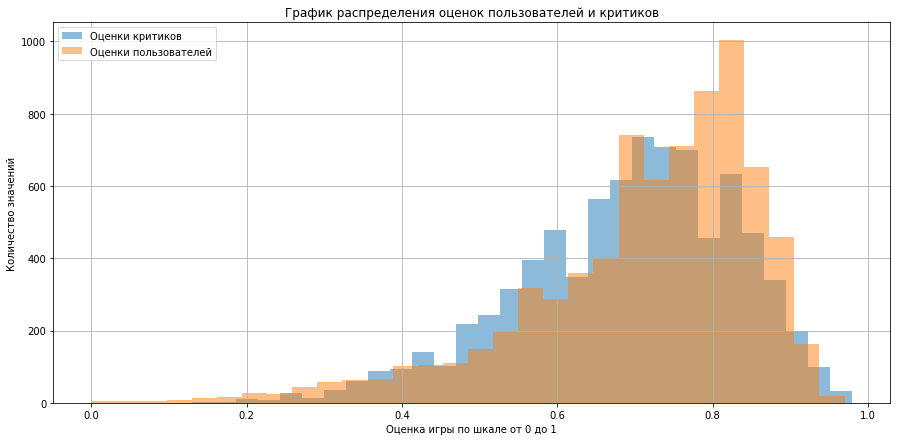

In [28]:
ax = games['critic_score'].plot(
    kind='hist', bins=30, alpha=0.5, figsize=(15,7), grid=True, label='Оценки критиков')

ax = games['user_score'].plot(
    kind='hist', bins=30, alpha=0.5, figsize=(15,7), grid=True, label='Оценки пользователей')

ax.set_xlabel('Оценка игры по шкале от 0 до 1')
ax.set_ylabel('Количество значений')
ax.set_title('График распределения оценок пользователей и критиков')

ax.legend()
plt.show()

Между оценками критиков и игроков естественным образом присутствуют различия, однако в целом сходство прослеживается. По графику видно, что критики более охотно ставят играм низките оценки от 0 до 0.2 (вероятно, это обусловлено изначально большим диапазоном оценок: игроки свободны выбирать между 0, 1 и 2 при желании поставить низкую оценку, в то время как в распоряжении критиков все целые числа от 0 до 20).

### <a id="13"> 2.6. Расчет общего количества продаж</a>

Добавим в таблицу столбец **'total_sales'**, в который поместим сумму значений из столбцов, содержащих данные по продажам в четырех категориях регионов.

In [29]:
games['total_sales'] = games['na_sales'
                            ] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Построим график частоты встречаемости показателей продаж по всем регионам и в общем. 

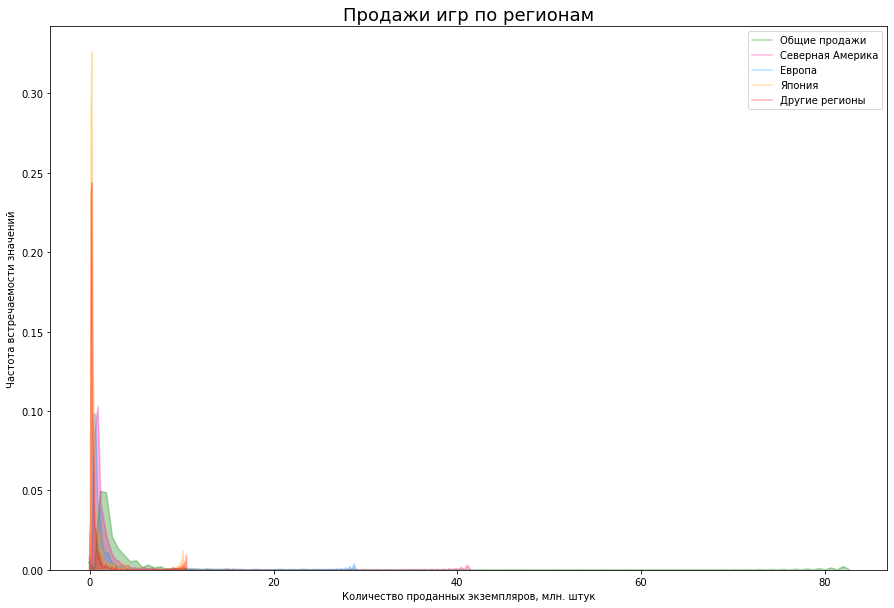

In [30]:
plt.figure(figsize=(15,10))
sns.kdeplot(games['total_sales'], shade=True, color="g", label='Общие продажи', alpha=.3)
sns.kdeplot(games['na_sales'], shade=True, color="deeppink", label='Северная Америка', alpha=.3)
sns.kdeplot(games['eu_sales'], shade=True, color="dodgerblue", label="Европа", alpha=.3)
sns.kdeplot(games['jp_sales'], shade=True, color="orange", label="Япония", alpha=.3)
sns.kdeplot(games['other_sales'], shade=True, color="red", label="Другие регионы", alpha=.3)

plt.title('Продажи игр по регионам', fontsize=18)
plt.xlabel('Количество проданных экземпляров, млн. штук')
plt.ylabel('Частота встречаемости значений')
plt.legend()
plt.show()

Несмотря на то, что большое количество игр с небольшим количеством продаж и небольшое количество игр с очень хорошими показателями по продажам делают график не слишком информативным, мы, однако, можем извлечь из него некоторую информацию: продажи в категории "другие регионы" максимально приближены к продажам в Японии.
Также интересно то, что для всех регионов характерен незначительный, но видимый рост количества проданных экземпляров игры для показателей по продажам, близких к максимальным. Это "хиты продаж", игры, наиболее ожидаемые большим количеством геймеров.
Для Япониии и "других регионов" эти всплески приходятся на показатели в районе 10 миллионов проданных копий игры. В Европе - около 30 миллионов, В Северной Америке - около 42 миллионов.

### <a id="14"> 2.7. Категоризация данных</a>

#### Категоризация игровых платформ

In [31]:
p10 = games['platform'] == 'PS2'
p11 = games['platform'] == 'PS3'
p12 = games['platform'] == 'PS' 
p13 = games['platform'] == 'PS4'
p20 = games['platform'] == 'X360'
p21 = games['platform'] == 'XB'
p22 = games['platform'] == 'Xone'
p30 = games['platform'] == 'PC'
p40 = games['platform'] == 'NES'
p41 = games['platform'] == 'SNES'
p42 = games['platform'] == 'GC'
p43 = games['platform'] == 'Wii'
p44 = games['platform'] == 'WiiU'
p45 = games['platform'] == 'N64'
p50 = games['platform'] == 'GBA'
p51 = games['platform'] == 'DS'
p52 = games['platform'] == '3DS'
p53 = games['platform'] == 'GB'
p54 = games['platform'] == 'PSV'
p55 = games['platform'] == 'PSP'

games['platform_category'] = np.select(
    [p10, p11, p12, p13, p20, p21, p22, p30, p40, p41, p42, p43, p44, p45,
     p50, p51, p52, p53, p54, p55],
    ['playstation', 'playstation', 'playstation', 'playstation',
     'xbox', 'xbox', 'xbox', 
     'pc', 
     'nintendo', 'nintendo', 'nintendo', 'nintendo', 'nintendo', 'nintendo',
     'portable', 'portable', 'portable', 'portable', 'portable', 'portable'], 
                           default='other')

Посмотрим на результат категоризации.

In [32]:
games['platform_category'].value_counts()

portable       5230
playstation    5081
nintendo       2679
xbox           2086
pc              974
other           663
Name: platform_category, dtype: int64

На *первом месте* среди наших данных **портативные игровые приставки**. С небольшим отставанием за ними следуют игровые платформы **PlayStation**. Почти вдвое меньший показатель у домашних платформ **Nintendo**. Чуть больше 2000 у **XBox**, чуть меньше 1000 у **персональных компьютеров** и 646 строк поделили между собой все остальные игровые консоли, отнесенные к категории **"другие"**.

NB
1. Учитывая, что категория портативных консолей представлена консолями **Nintendo и PlayStation**, и *первые 3 места* по количеству проданных игр принадлежат, **помимо портативных консолей**, игровым системам **Sony и Nintendo**, можно с уверенностью заключить, что **Sony PlayStation и Nintendo** - <u><b>лидеры рынка игровых приставок</b></u>.
2. С другой стороны, в настоящее время сегмент портативных игровых приставок находится в упадке в связи с увеличением производительной мощности смартфонов, достаточной для использования их в качестве переносных игровых систем.
3. Значимость компании **Nintendo** в современных реалиях может быть преувеличена: компания обеспечила себе место в первой тройке за счет, во-первых, большего количества различных вариантов игровых приставок, чем у конкурентов, и во-вторых, за счет более раннего начала деятельности по производству и продажек игровых систем. Отдельного упоминания заслуживает тот факт. что на момент выполнения анализа данных (начало 2021 года) у **Nintendo** отсутствует в предложении домашняя игровая система "свежего" поколения. 
4. **Персональные компьютеры** могли занять предпоследнюю строчку по продажам игр в связи с широким распространением и большим количеством игровых online-магазинов, позволяющих приобрести цифровую версию игры, и не привязывающих пользователя к физическому носителю. (То же можно сказать и о наиболее современных поколениях специализированных игровых систем, однако в их случае влияние на общую картину не столь велико).

#### Изменение категорий возрастного рейтинга

Нам необходимо измениить:
- категорию **'K-A'** на категорию **'E'**;
- категорию **'AO'** на категорию **'M'**.

In [33]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('AO', 'M')
games['rating'].value_counts()

no_rating    6764
E            3993
T            2961
M            1564
E10+         1420
EC              8
RP              3
Name: rating, dtype: int64

### <a id="15">3. Анализ данных</a>

### <a id="16">3.1. Изучение изменения игрового рынка по годам</a>

Выясним, сколько игр выпускалось за каждый год, представленный в нашем датасете.

In [34]:
games_years = games.pivot_table(
    index='year_of_release', values='name', 
    aggfunc='count').reset_index().rename(columns={'name': 'count'})

Построим гистограмму распределения количества игр по годам.

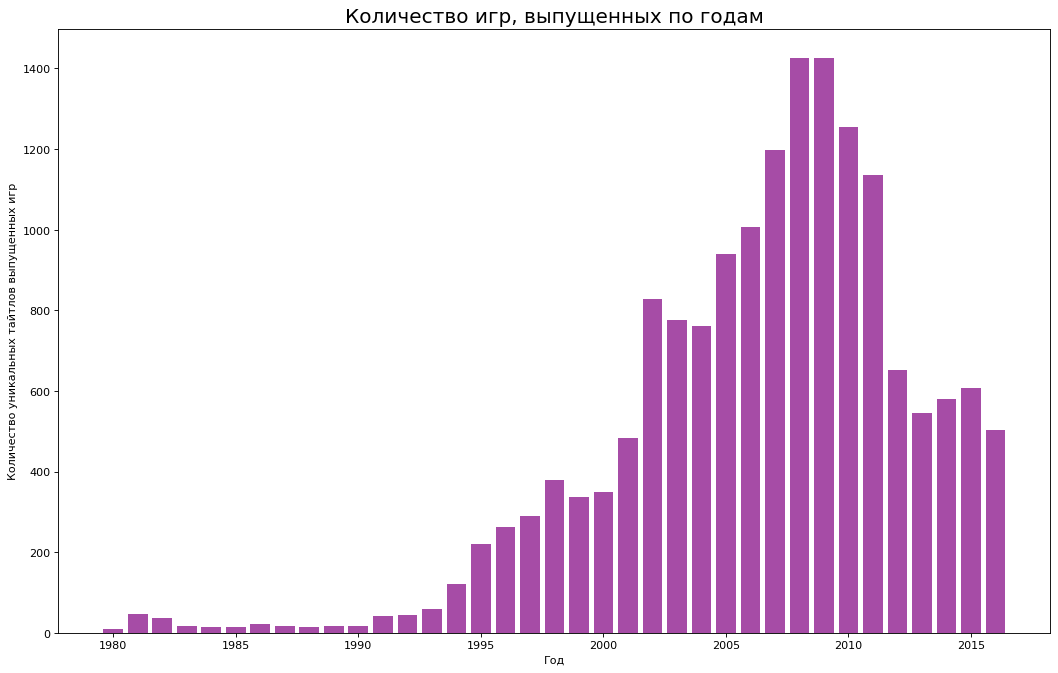

In [35]:
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(games_years['year_of_release'], games_years['count'], color='purple', alpha=.7)

plt.title('Количество игр, выпущенных по годам', fontsize=18)
plt.xlabel('Год')
plt.ylabel('Количество уникальных тайтлов выпущенных игр')
plt.show()

Как видно из графика, с 1980 по 1990 год ежегодно выпускалось от одного до нескольких десятков игр. После 1990 года начался едва заметный рост количества выпускаемых ежегодно игр, ставший заметным в 1994 году (как мы выяснили, именно в этом году вышло первое поколение игровой консоли **Sony PlayStation**) с показателем более 100 игр за год. В 1995 году количество игр превысило 200 и продолжило расти, достигнув локального пика в 1998 году с показателем в 400 оригинальный тайтлов. В 1999 и 2000 годах наблюдается незначительный спад, после чего в 2001 году количество игр снова растет и уже приближается к 500. 2002 год - резкий скачок до более чем 800 оригинальных тайтлов и продолжение роста количества до глобального пика в 2008 - 2009 годах (около 1400 оригинальных тайтлов). После чего наблюдается постепенный спад до уровня около 600 тайтлов в год в 2012 - 2016 годах. <font color = 'green'>Поскольку данные за 2016 год неполные, по итогам года можем получить картину, соответствующую небольшому, но росту с 2013 по 2016 года. Можем предположить, что 2017 год покажет результаты по крайней мере не хуже 2016 года. Если темпы роста последних лет сохранятся, ожидаем от 650 до 700 тайтлов, преставленных в 2017 году.</font>

Очевидно, что данные с 1980 года по 1994 год не представляют для нас особого интереса в силу давности и принадлежности периоду зарождения игровой индустрии.

После 1995 года рынок компьютерных игр начинает приобретать современные черты. Однако для построения прогнозов и рекомендаций бизнесу имеет смысл брать данные за последний период - с 2012 по 2016 года.

### <a id="17"> 3.2. Изучение игровых платформ</a>

Выведем на экран **Топ-10** игровых платформ по общему количеству проданных копий игр.

In [36]:
games.pivot_table(index='platform', 
                  values='total_sales', 
                  aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Выполним аналогичную операцию для укрупненных категорий игровых платформ.

In [37]:
games.pivot_table(index='platform_category', 
                  values='total_sales', 
                  aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()

,platform_category,total_sales
0,playstation,3240.42
1,portable,1986.55
2,nintendo,1858.40
3,xbox,1229.16
4,other,339.24
5,pc,259.52


**Первое, третье и шестое** места принадлежат различным поколениям игровой консоли *PlayStation*. На **втором** месте игровая консоль *XBox 360 от Microsoft* (это единственная строчка в **Топ-10**, доставшаяся Microsoft). На последнем **10** месте персональные компьютеры, **4** место досталось игровой консоли *Nintendo Wii*, **5, 7 и 9** места достались *портативным консолям* Nintendo и Sony, причем Nintendo в данном случае оказалась популярнее Sony.

### <a id="18">3.3. Изучение платформ с наибольшими суммарными показателями продаж</a>

Построим распределение по годам суммарных продаж игр для всех игровых платформ, отсортируем данные по убыванию показателя общих продаж, и выведем на экран первые 15 строк.

In [38]:
top_platforms_by_year = games.query('year_of_release >= 1995').pivot_table(
    index=['platform', 'year_of_release', 'platform_category'], 
                  values='total_sales', 
                  aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()

In [39]:
top_platforms_by_year.head(15)

,platform,year_of_release,platform_category,total_sales
0,PS2,2004.0,playstation,211.81
1,Wii,2009.0,nintendo,206.97
2,PS2,2002.0,playstation,205.38
3,PS2,2003.0,playstation,184.31
4,Wii,2008.0,nintendo,171.32
5,X360,2010.0,xbox,170.03
6,PS,1998.0,playstation,169.49
7,PS2,2001.0,playstation,166.43
8,PS2,2005.0,playstation,160.66
9,PS3,2011.0,playstation,156.78


Построим гистограмму плотности распределения количества проданных игр по годам.

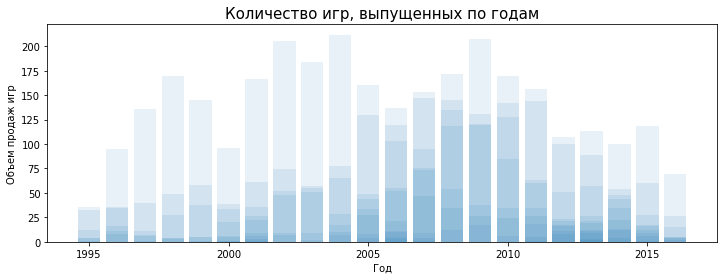

In [40]:
plt.figure(figsize=(12,4))
plt.bar(top_platforms_by_year['year_of_release'], top_platforms_by_year['total_sales'], alpha=.1)
plt.title('Количество игр, выпущенных по годам', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Объем продаж игр')
plt.show()

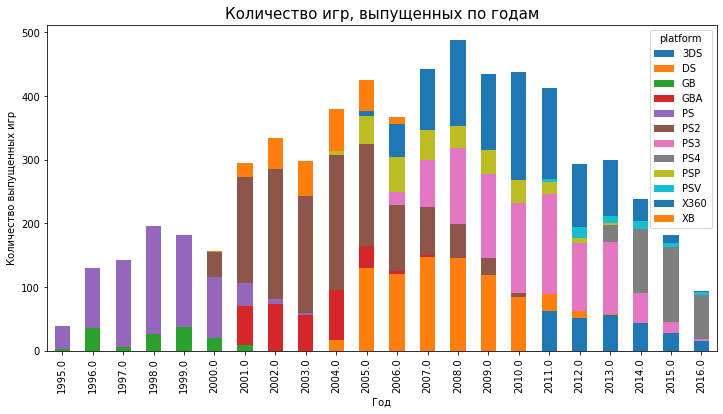

In [41]:
test = games.query(             # построим график только для PS, XBox и Nintendo
    'year_of_release >= 1995 and (platform_category == "xbox" or platform_category == "playstation"or platform_category == "portable")').pivot_table(
    index='platform', columns = 'year_of_release', 
                  values='total_sales', 
                  aggfunc='sum')

test.T.plot(kind='bar', stacked=True, figsize=(12,6));
plt.title('Количество игр, выпущенных по годам', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

Также передадим в список названия игровых платформ из Топ-15 по количеству проданных игр за год (всего получим 6 наименований).
После чего через цикл построим гистограммы распределения продаж игр по годам для каждой платформы.

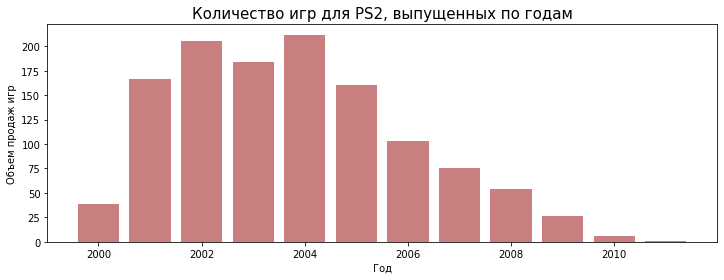

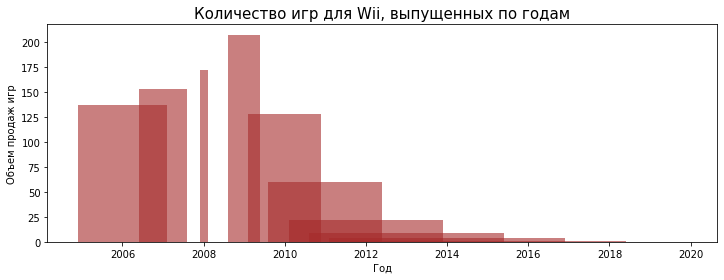

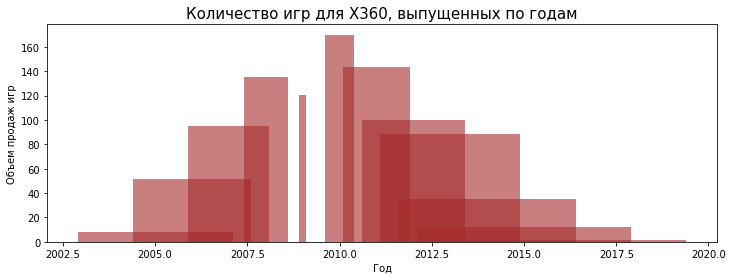

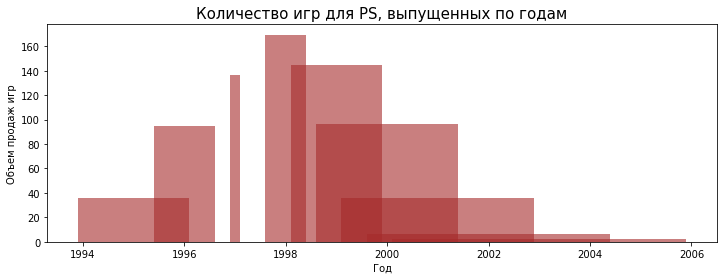

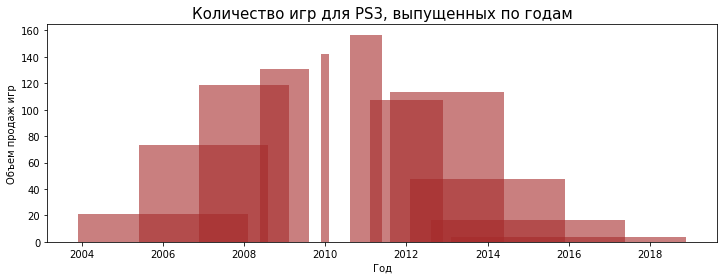

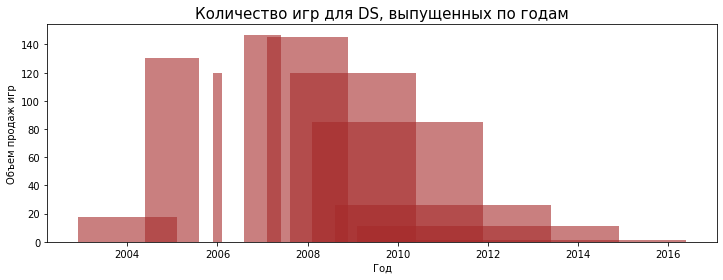

In [42]:
top_platform_list = ['PS2', 'Wii', 'X360', 'PS', 'PS3', 'DS']
for platform in top_platform_list:
    plt.figure(figsize=(12,4))
    plt.bar(top_platforms_by_year[top_platforms_by_year['platform'] == platform]['year_of_release'],
            top_platforms_by_year[top_platforms_by_year['platform'] == platform]['total_sales'],
            color='brown', alpha=.6)
    plt.title('Количество игр для ' + str(platform) +', выпущенных по годам', fontsize=15)
    plt.xlabel('Год')
    plt.ylabel('Объем продаж игр')
    plt.show()

### <a id="19"> 3.4. Изучение данных за актуальный период</a>

Определим актуальный период для выполнения прогнозов на 2017 год на основании следующих показателей:
1. Изменения игровой индустрии с течением времени в целом (состояние рынка в виде ежегодного объема продаж игр для всех игровых платформ).
2. Актуальное поколение игровых приставок и "срок жизни" поколений приставок.

На основании графика изменения объема продаж по годам можем сделать вывод, что актуальным периодом по отношению к 2017 году будет являться период с 2012 по 2016 года.

Средний срок активности поколений игровых приставок в плане продаж игр для этих приставок составляет 10 лет, однако наибольшая активность (наибольшие объемы продаж игр) приходятся на центральные 5 лет.

Таким образом, в качестве актуального периода выбираем период длительностью в 5 лет с 2012 по 2016 год.

Последние поколения игровых приставок трех основных игроков этого рынка вышли в 2013 году у Sony и Microsoft и в 2012 году у Nintendo. Они и представляют наибольший интерес при прогнозировании, поскольку к 2017 году должны находиться на пике своей популярности.

Создадим новый датасет, выполнив срез данных по временному интервалу основного датасета, и в дальнейшем будем обращаться при анализе к новой таблице.

In [43]:
games_actually = games.query('2012 <= year_of_release <= 2016')

In [44]:
# запросим информацию о полученном новом датасете
games_actually.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 13 columns):
name                 2886 non-null object
platform             2886 non-null object
year_of_release      2886 non-null float64
genre                2886 non-null object
na_sales             2886 non-null float64
eu_sales             2886 non-null float64
jp_sales             2886 non-null float64
other_sales          2886 non-null float64
critic_score         1312 non-null float64
user_score           1531 non-null float64
rating               2886 non-null object
total_sales          2886 non-null float64
platform_category    2886 non-null object
dtypes: float64(8), object(5)
memory usage: 315.7+ KB


Итак, мы получили таблицу с 2886 строками данных. Этого должно быть вполне достаточно для составления прогноза.

In [45]:
games_total_sales = games_actually.pivot_table(
    index='platform', columns='year_of_release', 
                  values='total_sales', 
                  aggfunc='sum')#.sort_values(
   # by='total_sales', ascending=False).reset_index().head(20)
games_total_sales

year_of_release,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Проанализируем полученную сводную таблицу:
- **2012 год:**
    - PS3 - 107 миллионов проданных копий игр, 3 место в общем списке за пятилетний период;
    - X360 - около 100 млн., 5 место;
    - 3DS - 51 млн., 11 место;
    - PC - 23 млн., 18 место;
    - Wii - 22 млн. и 20 место;
    - *в этом году вышла WiiU, и в следующем году выходят PS4 и XOne.*
    
    
- **2013 год:**
    - PS3 - 113 млн., 2 место;
    - Х360 - 89 млн., 6 место;
    - 3DS - 57 млн., 9 место;
    - PS4 - 26 млн., 17 место.
    
    
- **2014 год:**
    - PS4 - 100 млн., 4 место;
    - XOne - 54 млн., 10 место;
    - PS3 - 48 млн., 12 место;
    - 3DS - 44 млн., 13 место;
    - X360 - 35 млн., 14 место;
    - WiiU - 22 млн., 19 место.
    
    
- **2015 год:**
    - PS4 - 119 млн. и 1 место в топе среди всех платформ за 5 лет;
    - XOne - 60 млн., 8 место;
    - 3DS - 28 млн., 15 место.
    
    
- **2016 год:**
    - PS4 - 70 млн., 7 место;
    - XOne - 26 млн., 16 место.

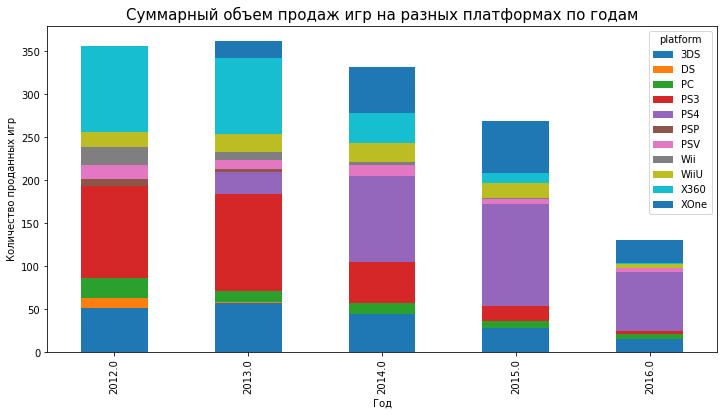

In [46]:
games_total_sales.T.plot(kind='bar', stacked=True, figsize=(12,6));
plt.title('Суммарный объем продаж игр на разных платформах по годам', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Количество проданных игр')
plt.show()

**Выводы:**

1. Игровые приставки **PlayStation** пользуются большей популярностью, чем **XBox**.
2. Сильной стороной **Nintendo** являются ее портативные игровыен консоли.
3. Разница в популярности **Playstation и Xbox** сохраняется на всем протяжении периода актуальности игровой платформы.
4. *Данные за 2016 год* являются неполными, и их *лучше исключить* из анализа, остановившись на периоде 2012 - 2015 гг.
5. В 2017 году наиболее перспективными платформами для предложения игр будут **PS4 (*1 место*)** и **XOne (*2 место*)**.
6. Имеет смысл следить за новостями о планируемом выходе следующего поколения *портативной игровой консоли* от **Nintendo** (учитывая выход 3DS в 2011 году, в ближайшее время компания может представить следующее поколение).

<font color='grey'>*// инсайдерская информация из будущего: в 2017 году Nintendo действительно выпустила новую портативную игровую консоль Nintendo Switch, и по состоянию на 31 декабря 2019 года, на Nintendo Switch было продано более 310,65 миллионов копий игр.

### <a id="20">3.5. Построение диаграммы размаха</a>

Построим графики "ящик с усами" по глобальным продажам игр в разбивке по платформам.

In [48]:
games_total_sales = games_actually.pivot_table(
    index=['platform', 'year_of_release'], 
                  values='total_sales', 
                  aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().head(20)

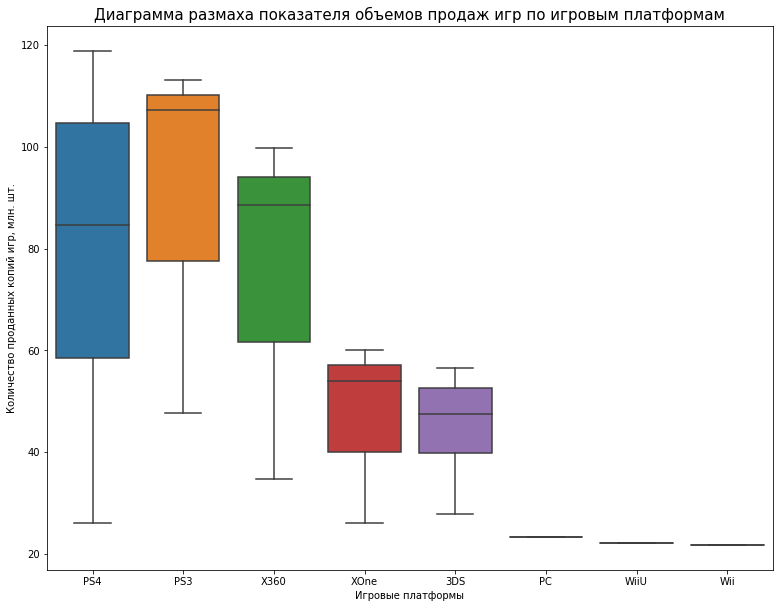

In [49]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=games_total_sales)

plt.title('Диаграмма размаха показателя объемов продаж игр по игровым платформам', fontsize=15)
plt.xlabel('Игровые платформы')
plt.ylabel('Количество проданных копий игр, млн. шт.')
plt.show()

По графику, представленному выше, мы видим следующее:
1. Самое большое значение медианы принадлежит **PS3** как в абсолютном показателе, так и относительно собственных первой и третьей квартилей.
2. В относительном показателе ситуация с **X360** похожа на **PS3**, а меньшие абсолютные показатели обусловлены меньшей популярностью игровой консоли Microsoft в принципе.
3. На основании предыдущих пунктов можно сделать вывод, что к концу своего жизненного цикла *диаграммы размаха оказываются сильно смещенными влево*: относительно небольшое количество игровых тайтлов обеспечивает половину продаж игр для платформы, и достаточно большое количество различных тайтлов составляют другую половину продаж. Расстояние между границей 3 квартили и максимальным значением значительно меньше расстояния между границей 1 квартили и минимальным значением.
4. На графиках не видно выбросов, все данные из нашей таблицы попадают в доверительный интервал.
5. Данные по **PC, Wii и WiiU** нерепрезентативны. В случае с последним поколением игровой платформы Microsoft, **XOne** показала немногим лучшие результаты, чем **3DS** от Nintendo и сильное отставание от тройки лидеров. Это может говорить о том, что XBox менее популярен и развивается с меньшей скоростью, чем PlayStation, однако является более перспективным, чем игровые платформы Nintendo. В будущем ожидается соотношение **XOne к PS4**, близкое к отношению **X360 - PS3**.

Посмотрим также на количественные показатели общих продаж игр для платформ за рассматриваемый период.

In [50]:
games_total_sales.groupby('platform').sum(
).drop('year_of_release', axis=1).reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales
3,PS4,314.14
2,PS3,268.37
6,X360,223.06
0,3DS,179.47
7,XOne,140.36
1,PC,23.22
5,WiiU,22.03
4,Wii,21.71


Мы имеем победителей: в нашем **Топ-5** наиболее значимых игровых платформ остаются **PS3, PS4, X360, 3DS и XOne.**

### <a id="21"> 3.6. Изучение влияния отзывов на продажи</a>

1. Сперва построим график рассеяния зависимости объема продаж от оценок пользователей и критиков для игровой платформы PS3 (как для лидера по объему продаж игр за рассматриваемый период).

2. Затем рассчитаем коэффициенты корреляции.

3. После чего произведем те же действия для всех изучаемых платформ в целом и сравним результаты.

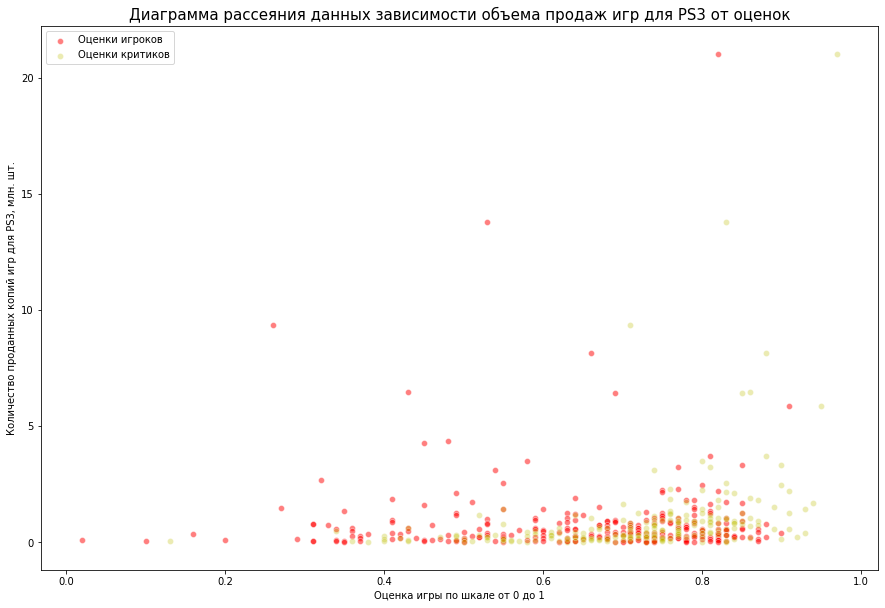

In [51]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='user_score', y='total_sales', data=games_actually.query('platform == "PS3"'), 
                alpha=.5, label='Оценки игроков', color='r')
sns.scatterplot(x='critic_score', y='total_sales', data=games_actually.query('platform == "PS3"'),
                alpha = .3, label='Оценки критиков', color='y')

plt.title('Диаграмма рассеяния данных зависимости объема продаж игр для PS3 от оценок', fontsize=15)
plt.xlabel('Оценка игры по шкале от 0 до 1')
plt.ylabel('Количество проданных копий игр для PS3, млн. шт.')
plt.legend()
plt.show()

Рассчитаем коэффициент корреляции соответствующих показателей.

In [52]:
print('Корреляция между объемом продаж и оценками игроков для PS3 составляет', games_actually[games_actually['platform'] == 'PS3']['total_sales'].corr(games_actually[games_actually['platform'] == 'PS3']['user_score']))
print('Корреляция между объемом продаж и оценками критиков для PS3 составляет', games_actually[games_actually['platform'] == 'PS3']['total_sales'].corr(games_actually[games_actually['platform'] == 'PS3']['critic_score']))
print('Корреляция между оценками игроков и оценками критиков для PS3 составляет', games_actually[games_actually['platform'] == 'PS3']['user_score'].corr(games_actually[games_actually['platform'] == 'PS3']['critic_score']))

Корреляция между объемом продаж и оценками игроков для PS3 составляет -0.005143522887113768
Корреляция между объемом продаж и оценками критиков для PS3 составляет 0.3314972592629592
Корреляция между оценками игроков и оценками критиков для PS3 составляет 0.5394556902119465


Наблюдаем отсутствие взаимосвязи между объемами продаж игр и оценками игроков, очень слабую взаимосвязь объемов с оценками критиков, и среднюю взаимосвязь оценок пользователей с оценками критиков.

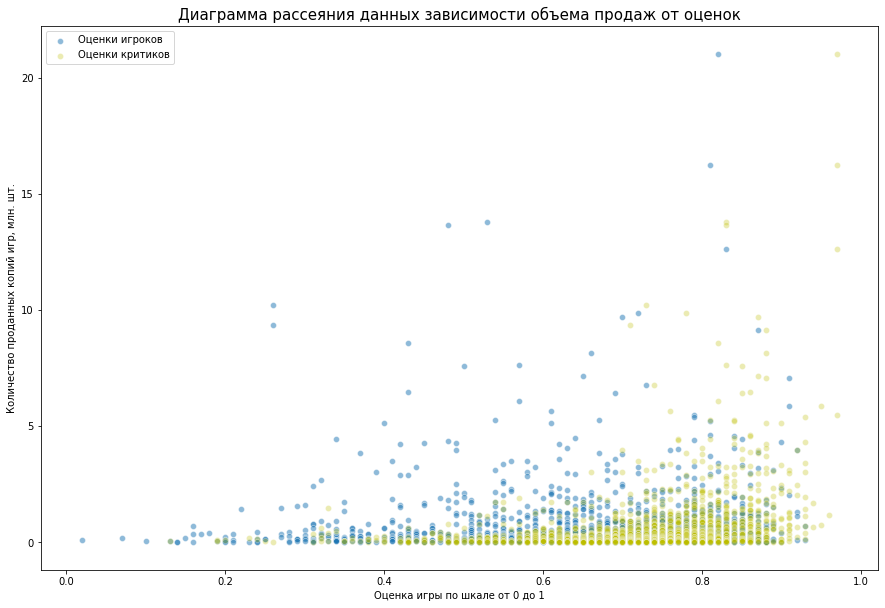

In [53]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='user_score', y='total_sales', data=games_actually, 
                alpha=.5, label='Оценки игроков')
sns.scatterplot(x='critic_score', y='total_sales', data=games_actually,
                alpha = .3, label='Оценки критиков', color='y')

plt.title('Диаграмма рассеяния данных зависимости объема продаж от оценок', fontsize=15)
plt.xlabel('Оценка игры по шкале от 0 до 1')
plt.ylabel('Количество проданных копий игр, млн. шт.')
plt.legend()
plt.show()

Рассчитаем коэффициент корреляции соответствующих показателей.

In [54]:
print('Корреляция между объемом продаж и оценками игроков составляет', games_actually['total_sales'].corr(games_actually['user_score']))
print('Корреляция между объемом продаж и оценками критиков составляет', games_actually['total_sales'].corr(games_actually['critic_score']))
print('Корреляция между оценками игроков и оценками критиков составляет', games_actually['user_score'].corr(games_actually['critic_score']))

Корреляция между объемом продаж и оценками игроков составляет 0.004428817675493265
Корреляция между объемом продаж и оценками критиков составляет 0.3081967459207773
Корреляция между оценками игроков и оценками критиков составляет 0.5177272095232914


Данные из рассчетов подтверждают и дополняют то, что видно из графика рассеяния: 
1. Коэффициент корреляции между объемом продаж и оценками пользователей настолько мал, что его можно считать равным нулю, корреляция отсутствует. Отчасти это может объясняться тем, что для того, чтобы игрок поставил игре оценку, он, в большинстве случаев, игру должен сначала купить.
2. Коэффициент корреляции между объемом продаж и оценками критиков равен 0.3 и говорит об очень слабой взаимосвязи. Взаимосвязь есть, но она настолько слаба, что ее можно не брать в расчет. Это может быть обусловлено тем, что хорошие оценки критиков могут стать дополнительным аргументом при решении приобретения игры.
3. Между оценками игроков и оценками критиков наблюдаем среднюю корреляцию с коэффициентом в 0.52.
4. То, что можно увидеть на графике, но о чем нам не скажет значение коэффициента корреляции: в наших данных нет игр с крайне низким рейтингом и высоким показателем объема продаж, с другой стороны, максимальные объемы продаж соответствуют играм с крайне высоким рейтингом.
    - Отсюда можно сделать вывод, что на продажи могут повлиять не оценки критиков или игроков в целом, а предельные значения оценок. Иными словами, средняя оценка не увеличивает и не уменьшает привлекательности игры, тогда как крайне низкая оценка отталкивает от ее приобретения, а крайне высокая может пробудить интерес даже при изначально безразличном отношении.

**Вывод:**
- Рассеяние результатов для самой популярной игровой платформы соответсвует рассеянию результатов по всем платформам. Общая картина сохраняется при некоторых незначительных различиях.
- Оценки игроков не влияют на объемы продаж, оценки критиков влияют слабо.
- Можно ожидать влияние предельных оценок (в первую очередь, критиков) на поведение покупателей. Крайне низкие оценки  снижают интерес к игре, крайне высокие - повышают (хотя и в данном вопросе не без исключений: необоснованно высокие или низкие оценки критиков могут обернуться прямо-противоположным)
- Исходя из всего вышеозвученного можно заключить, что лучше не отталкиваться в прогнозировании популярности игры от оценок критиков и игроков.

### <a id="22"> 3.7. Изучение распределния игр по жанрам</a>

Построим древовидную карту жанров исследуемого временного интервала по аналогии с картой жанров для общего объема данных.

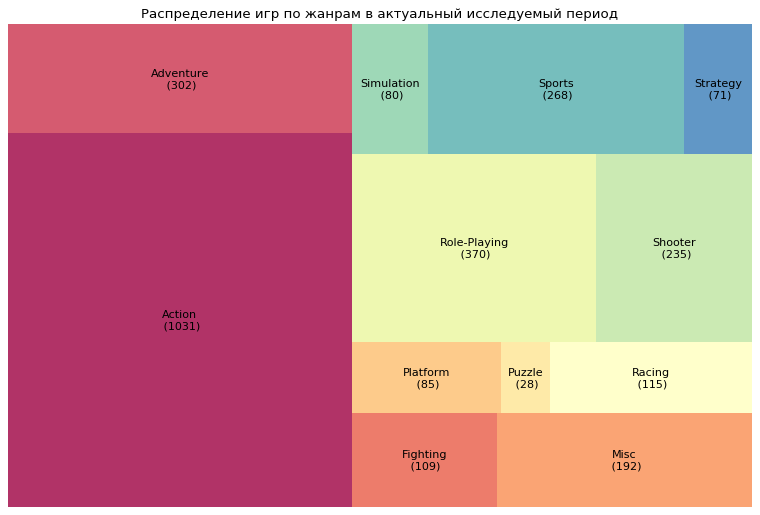

In [55]:
game_plot = games_actually.groupby('genre').size().reset_index(name='counts')
labels = game_plot.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = game_plot['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Распределение игр по жанрам в актуальный исследуемый период')
plt.axis('off')
plt.show()


По сравнению с общим объемом данных ситуация несколько изменилась: на первом месте по прежнему жанр Action, Sport сместился со 2 места на 4. Его место заняли игры жанра RPG (с показателем, почти в 2.5 раза меньшим, чем у игр жанра Action). В остальном картина схожая, то, что для нас важно - игры жанра Action пользовались и продолжают пользоваться максимальной популярностью.


Однако здесь мы имеем дело с количеством игровых тайтлов, включенных в категорию того или иного жанроа. Далее мы выясним, какие объемы продаж соответствуют каждому жанру.

In [56]:
genres_sales = games_actually.pivot_table(index='genre', 
                  values=['total_sales', 'name'], 
                  aggfunc={'total_sales':'sum', 'name':'count'}).sort_values(
    by='total_sales', ascending=False).reset_index().rename(columns={'name': 'count'})

genres_sales['index'] = genres_sales['total_sales']  / genres_sales['count']
genres_sales

,genre,count,total_sales,index
0,Action,1031,441.12,0.427856
1,Shooter,235,304.73,1.296723
2,Role-Playing,370,192.80,0.521081
3,Sports,268,181.07,0.675634
4,Misc,192,85.04,0.442917
5,Platform,85,61.00,0.717647
6,Racing,115,53.50,0.465217
7,Fighting,109,44.49,0.408165
8,Simulation,80,35.12,0.439000
9,Adventure,302,29.43,0.097450


Ожидаемо выяснилось, что на первом месте по продажам игры жанра **Action**: 441 миллион проданных копий игр данного жанра. На втором месте игры жанра **Shooter** и почти 305 миллионов копий. Далее **ролевые игры** - 193 миллиона, и **спортивные игры** - 181 миллион копий. Последние места занимают **паззлы и стратегии**. 
Подтвердилось наше изначальное предположение, что более *активные игры пользуются наибольшей популярностью*.

Однако, введя дополнительный параметр **`index`** - отношение общего объема продаж игр конкретного жанра к количеству игровых тайтлов, соответствующих этому жанру, получили интересную информацию: самыми популярными играми оказались принадлежащие к жанру **Shooter**: весь объем продаж распределился между 235 тайтлами, тогда как количество тайтлов жанра **Action** превышает аналогичный показатель для жанра **Shooter** более чем *в 4 раза*. На 2 месте по индексу **платформеры**: скромное 6 место по объему продаж, однако за счет небольшого количества тайтлов индекс достигает 0.72. Для сравнения индекс **шутеров** составляет 1.3, а индекс **спортивных игр** с их третьим местом - 0.68.

Таким образом, можем заключить, что при планировании продаж упор следует делать в первую очередь на **шутеры**. Также большое значение имеют игры жанра **Action, ролевые игры и спортивные игры**. Необходимо понимать, что концентрация только на объеме продаж приведет к большим показателям объема продаж, однако грозит значительным объемом торговых позиций ("складских запасов") и нереализованной продукции. С учетом рассчитанного нами индекса можно достичь баланса по объемам и степени реализации запасов.

В качестве итога, мы бы рекомендовали сосредоточиться на жанрах **Shooter, Action, Role-Playing и Sports**, исключить из ассортимента игры жанров **Adventure, Strategy и Puzzle**, а из оставшихся "нейтральных" жанров особое внимание уделить жанру **Platform**.

### <a id="23">Вывод по 3 разделу</a>
1. Десятилетие с 1980 по 1990 год - десятилетие зарождения рынка компьютерных и ведеоигр;
2. 2008-2009 года - пик развития рынка видеоигр;
3. В среднем в настоящее время выпускается по 500 уникальных тайтлов видеоигр в год;
4. Наибольшее количество проданных игр за все время приходится на игровую платформу **Sony PlayStation 2**;
5. Срок жизни поколения игровой платформы составляет около 10 лет, период наибольшей активности - медианные 5 лет срока жизни;
6. При составлении прогноза рынка и разработке рекламной стратегии стоит учитывать, насколько давно вышло последнее поколение игровых платформ, а также возможность выхода нового поколения в ближайшем будущем;
7. Абсолютным лидером игровых платформ является **Sony. Nintendo и Microsoft** борются за 2 и 3 место в разное время с переменным успехом;
8. Оценки критиков и игроков в среднем фактически не влияют на объемы продаж;
9. Наиболее популярны активные игровые жанры. Можно сформулировать закономерность: "*чем скучнее геймплей, тем меньше объем продаж*".

### <a id="24">4. Портрет пользователя по регионам</a>

Сперва создадим дочерние датасеты на основании срезов данных от основного датасета по регионам. Для этого обратимся к актуальному датасету **`games_actually`**.

In [57]:
games_region_platform = games_actually.pivot_table(index='platform', 
                        values=['na_sales', 'eu_sales', 'jp_sales'], 
                        aggfunc='sum').reset_index()


In [58]:
games_region_genre = games_actually.pivot_table(index='genre', 
                     values=['na_sales', 'eu_sales', 'jp_sales'], 
                     aggfunc='sum').reset_index()


### <a id="25">4.1. Сравнение Топ-5 жанров по регионам</a>

Выведем информацию по пяти наиболее популярным жанрам для каждого региона.

In [59]:
# Северная Америка
games_region_genre.sort_values(by='na_sales', ascending=False).drop(
    ['jp_sales', 'eu_sales'], axis=1).head()

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [60]:
# Европа
games_region_genre.sort_values(by='eu_sales', ascending=False).drop(
    ['jp_sales', 'na_sales'], axis=1).head()

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [61]:
# Япония
games_region_genre.sort_values(by='jp_sales', ascending=False).drop(
    ['eu_sales', 'na_sales'], axis=1).head()

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


**Вывод:**
1. В **европейском регионе** популярны те же жанры, что и в **североамериканском**, и примерно в том же соотношении. Отличается только жанр на 5 позиции: для Северной Америки это Misc, а для Европы - Racing.
2. В **Японии** ситуация отличается в значительной степени: безоговорочное лидерство жанра Action поставлено под сомнение, и он смещен на вторую позицию ролевыми играми (не даром существует целый поджанр - *jrpg*). В японском топе отсутствуют шутеры, спортивные игры и гонки, вместо них - симуляторы и файтинги.
3. Можно заключить, что по игровым предпочтениям мы имеем дело с двумя *глобальными регионами - восточным и западным*.

### <a id="025">4.1.* Самые популярные игры по жанрам

<font color = 'green'>Получим для каждого региона список самых популярных игр по каждому жанру. Это даст нам дополнительную информацию о предпочтениях игроков. Выводы представим в разделе 4.4.

In [62]:
genre_list = list(games_actually['genre'].unique())
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    for genre in genre_list:
        print('Лучшая игра жанра ' + str(genre) + ' в категории ' + str(region) + ' - ' 
              + games_actually[(games_actually['genre'] == genre) 
                               & (games_actually[games_actually['genre'] == genre]
                                  [region] == games_actually[games_actually['genre'] == genre]
                                  [region].max())][['name']].to_string
              (header=False, index=False))

Лучшая игра жанра Action в категории na_sales -  Grand Theft Auto V
Лучшая игра жанра Shooter в категории na_sales -  Call of Duty: Black Ops II
Лучшая игра жанра Role-Playing в категории na_sales -  Pokemon X/Pokemon Y
Лучшая игра жанра Platform в категории na_sales -  New Super Mario Bros. 2
Лучшая игра жанра Misc в категории na_sales -  Minecraft
Лучшая игра жанра Simulation в категории na_sales -  Animal Crossing: New Leaf
Лучшая игра жанра Sports в категории na_sales -  NBA 2K13
Лучшая игра жанра Fighting в категории na_sales -  Super Smash Bros. for Wii U and 3DS
Лучшая игра жанра Racing в категории na_sales -  Mario Kart 8
Лучшая игра жанра Strategy в категории na_sales -  StarCraft II: Heart of the Swarm
Лучшая игра жанра Adventure в категории na_sales -       Rise of the Tomb Raider
 The Walking Dead: Season One
Лучшая игра жанра Puzzle в категории na_sales -  Captain Toad: Treasure Tracker
Лучшая игра жанра Action в категории eu_sales -  Grand Theft Auto V
Лучшая игра жанра S

### <a id="26">4.2. Сравнение Топ-5 игровых платформ по регионам</a>

Выведем информацию по пяти наиболее популярным жанрам для каждого региона.

In [63]:
# Северная Америка
games_region_platform.sort_values(by='na_sales', ascending=False).drop(
    ['jp_sales', 'eu_sales'], axis=1).head()

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [64]:
# Европа
games_region_platform.sort_values(by='eu_sales', ascending=False).drop(
    ['jp_sales', 'na_sales'], axis=1).head()

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [65]:
# Япония
games_region_platform.sort_values(by='jp_sales', ascending=False).drop(
    ['na_sales', 'eu_sales'], axis=1).head()

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


**Вывод:**
1. В **Северной Америке** на 1 месте ожидаемо XBox 360 (для него это домашний регион). Интересно при этом, что PS4 популярнее XBox One (игровые приставки вышли в один год), и успела обогнать по популярности PS3. Можно заключить, что последнее поколение игровых приставок оказалось для Microsoft крайне неудачным. Либо, напротив, что Sony выпустила крайне удачную игровую платформу. Так или иначе, последнее поколение отличается по распределению предпочтений от предыдущего в пользу Sony.
2. В **Европе** схожая ситуация с поправкой на отсутствие лояльности европейских геймеров к платформам серии XBox. Первые два места у приставок Sony, 3 и 4 - у Microsoft. Также интересный момент: среди приставок Sony лидирует последнее поколение, а среди Microsoft - предыдущее.
3. **Япония** снова показывает нам иную картину: на первом месте портативная игровая платформа от Nintendo - 3DS, которая в Северной Америке и Европе занимала лишь пятую строчку (причем со значительным отрывом - в 2.5 раза больше проданных копий игр, чем у PS3, занимающей второе место). На 3 месте в топе еще одна портативная консоль - PlayStation Vita. Последнее поколение приставки от Sony занимает 4 место и с небольшим отрывом опережает WiiU.
4. Все говорит о том, что и в предпочтениях к игровым платформам прослеживаются *восточный и западный глобальные регионы*. 
5. Очевидно, при производстве своей последней игровой консоли **PlayStation 4**, Sony ориентировалась именно на более масштабный *западный регион*. Это объясняет высокую популярность в северноамериканском и европейском регионах, и отсутствие особого интереса непосредственно в Японии.

### <a id="27"> 4.3. Влияние рейтинга ESRB на продажи по регионам</a>

Cоздадим дочерний датасет на основании актуального датасета **`games_actually`**. Затем выведем информацию по количеству продланных игр в каждой категории возрастного рейтинга для регионов.

In [66]:
games_region_esrb = games_actually.pivot_table(index='rating', 
                     values=['na_sales', 'eu_sales', 'jp_sales'], 
                     aggfunc='sum').reset_index()

In [67]:
# Северная Америка
games_region_esrb.sort_values(by='na_sales', ascending=False).drop(
    ['jp_sales', 'eu_sales'], axis=1)

,rating,na_sales
2,M,231.57
0,E,114.37
4,no_rating,103.31
1,E10+,75.70
3,T,66.02


In [68]:
# Европа
games_region_esrb.sort_values(by='eu_sales', ascending=False).drop(
    ['jp_sales', 'na_sales'], axis=1)

,rating,eu_sales
2,M,193.96
0,E,113.03
4,no_rating,91.50
1,E10+,55.37
3,T,52.96


In [69]:
# Япония
games_region_esrb.sort_values(by='jp_sales', ascending=False).drop(
    ['na_sales', 'eu_sales'], axis=1)

,rating,jp_sales
4,no_rating,108.84
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


**Вывод:**
1. Снова наблюдаем схожие ситуаци для **северноамериканского и европейского регионов**: играют в основном взрослые (лица старше 17 лет). На втором месте - игры "для всех". Далее следуют игры для детей старше 10, и замыкает список рейтинг Т - для подростков от 13 до 17.
2. Логично предположить, что позиции со второй по 4 отражают не столько картину игроков, сколько *стремление производителей игр расширить аудиторию*: вместо Е10+ можно достичь соответствия рейтингу Е, и это увеличит потенциальную аудиторию, а значит, и объем продаж. А рейтинг Т либо можно свести к Е10+, либо довести до М, и сделать более интересным для взрослой аудитории.
3. И в этом рейтинге **Япония** значительно отличилась:на первом и втором местах с небольшой разницей игры для подростков и игры "для всех". Игры для взрослых только на 3 месте.
4. <font color='green'>Примерно в середине: на 3 месте из 5, но ближе ко 2, чем к 4, по объемам продаж в <b>западном регионе</b> игры без рейтинга. Даже если все игры без рейтинга относятся к рейтингу на 4 месте, этот рейтинг обгонит по продажам 2 место, но все еще не будет конкурировать с играми для взрослых. Таким образом, по западному региону на 1 месте однозначно игры рейтинга <b>М</b>.
5. В <b>Японии</b> все намного сложнее, игры без рейтинга занимают первое место, и объемы при этом превышают объемы по всем остальным рейтингам, вместе взятым. Здесь важдый момент заключается в том, что рейтинг <i>ESRB<i> действителен, в первую очередь, именно для <b>северноамериканского региона</b>, помимо <i>ESRB</i> существуют и другие рейтинговые системы оценки игр: <b><i>PEGI</i> в Европе, <u><i>CERO</i></u> в Японии</b>. Можно сделать вывод, что большая часть игр, пользующихся спросом в <b>Японии</b>, не проходят сертификацию по рейтингу <i>ESRB</i>, т.е. предназначены исключительно для домашнего региона.</font>

### <a id="28">4.4. Портрет геймера</a>

<img src ='https://telegramfor.me/ext_img/oldlentach/23123' alt="Who's gamer?">

  - Геймер из **Северной Америки** - совершеннолетний, играет в экшн-игры и шутеры на платформе XBox360,
  - геймер из **Европы** также совершеннолетний и играет в экшены и шутеры, только на PlayStation 4, 
  - геймер из **Японии** - подросток, играет на портативной платформе Nintendo 3DS в ролевые игры.

В **Европе и Америке** среди экшенов больше всего предпочитают **GTA 5**, то есть ценят в играх реализм. В **Японии** отдают предпочтение фэнтези - **Monster Hunter X**.

Самый популярный шутер **на западе** (в данном случае серия) - **Call of Duty**, - снова реализм, военные действия, высокий возрастной рейтинг. В **Японии** на первом месте мультяшная игра для всех возрастов, в которой персонажи стреляют чернилами (здесь на ум приходит такой культурный феномен, популярный в **Японии**,  как <a href='https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%B2%D0%B0%D0%B8%D0%B9#%D0%92%D0%BE%D1%81%D0%BF%D1%80%D0%B8%D1%8F%D1%82%D0%B8%D0%B5_%D0%B2_%D0%AF%D0%BF%D0%BE%D0%BD%D0%B8%D0%B8'>каваии</a>).

Самая популярная ролевая игра **во всех регионах - Pokemon X / Pokemon Y**. Выходит, что покемоны - универсальный ключ ко всем игровым рынкам.

То же касается платформеров - **Super Mario Bros 2**.

**Minecraft** - лидер жанра Misc по всем регионам.

Симулятор - **Animal Crossing: New Leaf**.

Из спортивных игр в **Америке** предпочитают **баскетбол**, в **Европе и Японии - футбол**.

Самый популярный файтинг - не Tekken, не Mortal Combat, а **Super Smash Bros** (в заключении попытаемся объяснить, почему это так, и почему при планировании рекламной стратегии особое внимание стоит обратить на эту игру).

Гоночная игра - **Mario Cart 8** для всех регионов.

По стратегиям, приключениям и паззлам нет пересечений (разве что для западного региона самая популярная стратегия - Starcraft 2).

Взглянем на то, что из себя представляет игра **Super Smash Bros:**
<img src='https://www.justpressplayonline.com/img/blog/Blog-Large-smashbros.jpg'>

Мы видим на одном постере целую толпу популярных и любимых многими героев: от покемонов, Соника и Марио до Солида Снейка и Донки Конга.

Также очевидно, что для "основных" жанров - экшенов и шутеров, - существует явное разделение на **западных** и **восточных** игроков. Первые предпочитают реализм, брутальность и высокий возрастной рейтинг, вторые - фэнтези, эпичность и мультяшность.
В остальном предпочтения сходятся, и рекламная кампания для разных рынков должна быть похожа на постер **Super Smash Bros**: в качестве основы - собрать вместе как можно больше наиболее популярных персонажей видеоигр. Дифференцировать только рекламные линии таких основных жанров как экшены и шутеры.

### <a id="29">5. Проверка гипотез</a>

В данном разделе мы ответим на два вопроса:
1. Являются ли средние пользовательские рейтинги платформ **Xbox One и PC** одинаковыми;
2. Являются ли средние пользовательские рейтинги жанров **Action и Sports** одинаковыми.

### <a id="30">5.1. Гипотеза о средних рейтингах PC и Xbox One</a>

- **H0** - Средние пользовательские рейтинги платформ **Xbox One и PC** не различается
- **H1** - Средние пользовательские рейтинги платформ **Xbox One и PC** различается

Сперва выполним **тест Левена** для проверки равенства дисперсий двух выборок - пользовательских рейтингов для платформы *XBox One* и пользовательских рейтингов для платформы *PC*. 

In [70]:
# выделим срезы по столбцу 'platform' в отдельные объекты типа series
pc = games_actually.query('platform == "PC"').dropna()['user_score']
                                             # избавимся от пропусков
xone = games_actually.query('platform == "XOne"').dropna()['user_score']

In [71]:
levene(pc, xone)

LeveneResult(statistic=6.256264688905123, pvalue=0.012818935705571605)

Столь низкое значение **p-value** (0.013) говорит нам о том, что дисперсии рассматриваемых выборок не равны.

In [72]:
print('Количество значений для PC:', pc.shape[0])
print('Количество значений для XBox One:',xone.shape[0])

Количество значений для PC: 197
Количество значений для XBox One: 165


Поскольку мы имеем дело с выборками из двух генеральных совокупностей, состоящими из 197 и 165 значений соответственно, следовательно, можем говорить об уместности применения для оценки распределения **t-критерия Стьюдента** для независимых малых выборок из генеральных совокупностей с неравными дисперсиями.

In [73]:
alpha = .01 # исходя их объема наших выборок,
            # критический уровень статистической значимости устанавливаем в 1%
            # //если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(    # функция ttest_ind вычисляет t-тест двух независимых выборок
    pc, 
    xone,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5926561176517549
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

У нас не получилось отвергнуть нулевую гипотезу, следовательно, *средние пользовательские рейтинги платформ XBox One и PC* действительно *не различаются*. Очевидно, на оценки игр влияют не платформы, а сами игры.

### <a id="31"> 5.2.Гипотеза о средних рейтингах жанров Action и Sports</a>

- **H0** - Средние пользовательские рейтинги игр жанров **Action и Sports** не различается
- **H1** - Средние пользовательские рейтинги игр жанров **Action и Sports** различается

Па аналогии с проверкой гипотезы 5.1., сперва выполняем **тест Левена**.

In [74]:
# выделим срезы по столбцу 'genre' в отдельные объекты типа series
action = games_actually.query('genre == "Action"').dropna()['user_score']
                                                  # избавимся от пропусков
sports = games_actually.query('genre == "Sports"').dropna()['user_score']

In [75]:
levene(action, sports)

LeveneResult(statistic=1.2201144904254186, pvalue=0.2698034213167573)

Значение **p-value** достаточно высокое (0.26), что говорит нам о равенстве дисперсий рассматриваемых выборок.

In [76]:
print('Количество значений для Action:', action.shape[0])
print('Количество значений для Sports:',sports.shape[0])

Количество значений для Action: 432
Количество значений для Sports: 141


Поскольку мы имеем дело с выборками из двух генеральных совокупностей, состоящими из 432 и 141 значений соответственно, следовательно, можем говорить в данном случае также об уместности применения для оценки распределения **t-критерия Стьюдента** для независимых малых выборок из генеральных совокупностей с равными дисперсиями.

In [77]:
alpha = .01 # исходя их объема наших выборок,
            # критический уровень статистической значимости устанавливаем в 1%
            # //если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(    # функция ttest_ind вычисляет t-тест двух независимых выборок
    action, 
    sports,
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.136332798737168e-16
Отвергаем нулевую гипотезу


**Вывод:**

При выбранном пороге значимости p-значение оказалось ничтожно малым, что позволяет нам отвергнуть нулевую гипотезу, следовательно, *средние пользовательские рейтинги жанров Action и Sports различается*.

### <a id="32"> 6. Общий вывод </a>

Мы проделали работу по выявлению закономерностей, присущих рынку видеоигр. Разобрались, какие производители являются наиболее перспективными игроками и какие игровые платформы пользуются наибольшей популярностью. Ответили на вопросы, как влияют на объем продаж видеоигры присущие ей оценки критиков и игроков и возрастной рейтинг. Составили портрет среднестатистического игрока по изучаемым регионам. Сформулировали дву гипотезы и выполнили их проверку.
Каждый этап работы сопровождается подробными комметариями и выводами о используемых методах и полученных результатах.

Возвращаясь к непосредственной задаче исследования, сформулируем рекламную (и ассортиментную) стратегию интернет-магазина "*Стримчик*" на 2017 год:
1. Игровой мир условно делится на два крупных лагеря: восточный и западный. Лагери сильно отличаются друг от друга, и требуют индивидуального подхода. При этом по объемам восточный лагерь уступает западному, и при отказе от дифференцированного подхода рекомендуется сконцентрироваться на западном лагере.
2. Наибольшей популярностью в 2017 году будут пользоваться игры для платформы PlayStation 4. XBox One - на позициях догоняющего.
3. Игрокам, как правило, неинтересны скучные игры. Об этом говорит расположение на противоположных полюсах популярности с одной стороны - экшенов и шутеров, с другой - паззлов и стратегий.
4. Не стоит обращать слишком много внимания на оценки (особенно игроков) если они не создают информационного шума вокруг игры. Беспрецедентно низкие или высокие оценки могут повлиять на продажи (причем нельзя заранее сказать, в каком случае - каким образом, универсального ответа здесь нет). Совет: ради стабильности - избегать шумихи.
5. ** Возможно, имеет смысл подумать над ребрендингом (хотя бы в ключе названия магазина) и над включением в ассортимент продукции игрового мерча и атрибутики (как известно, кинотеатрам приносит основную прибыль не кино, а попкорн) &#128516;